
- Name : Yogesh Murlidhar Siral
- PRN  : 240340128037
- Date : 17-05-2024

# Image Processing with Neural Network

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

## Import Statements

In [40]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections.abc import Callable
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


## Setup Global Parameters

In [42]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE =0.2
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [43]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [44]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [45]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [46]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [47]:
# what labels are present?
data_df.target.unique()

array([0, 1])

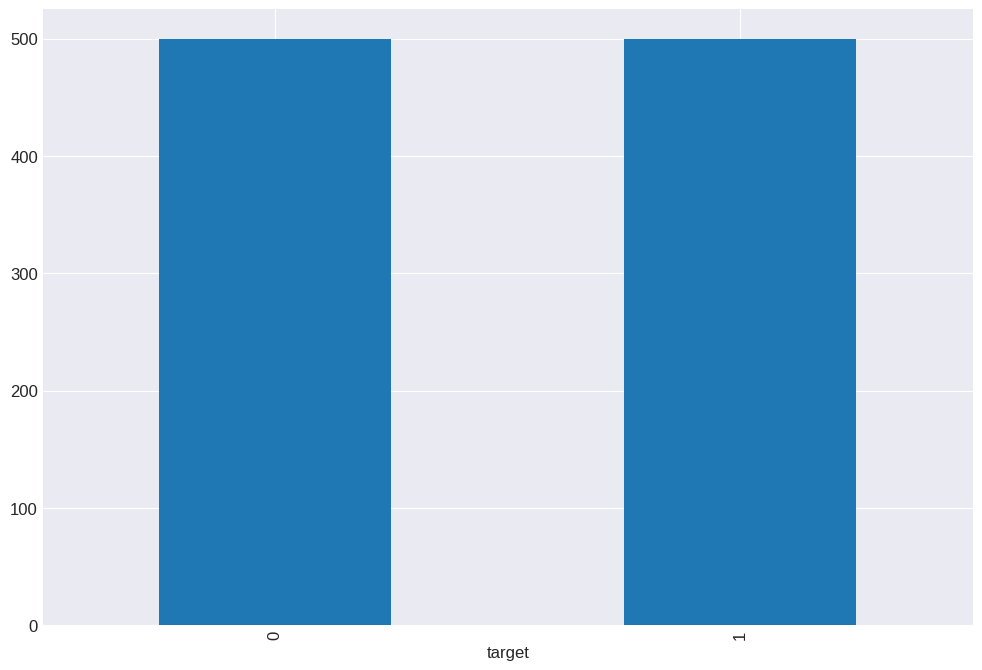

In [48]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Different ways of plotting data

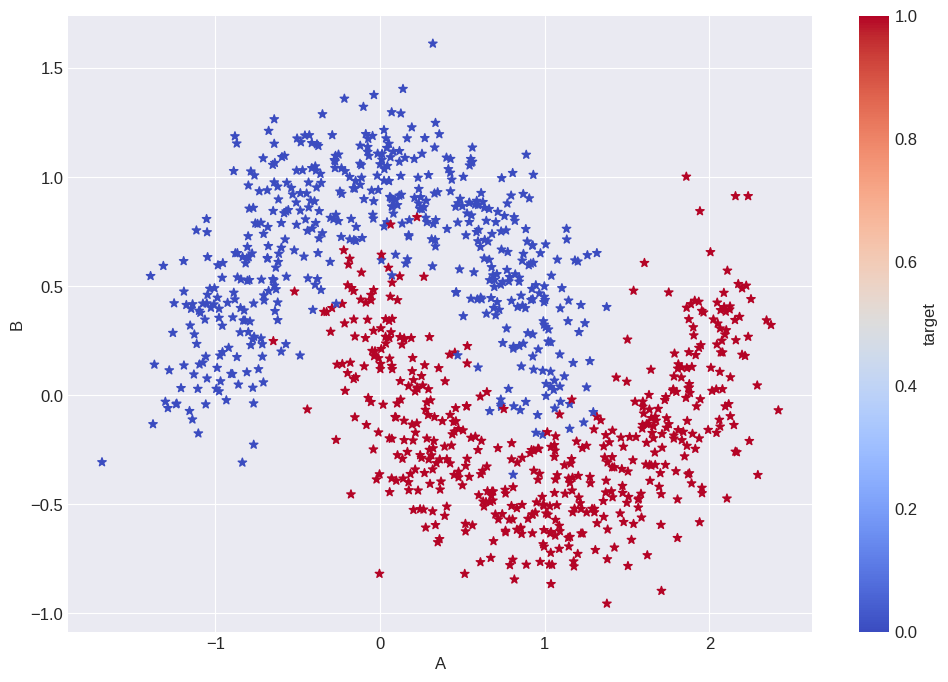

In [49]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

### 1. Activation functions

In [50]:
def fn_activ(z):return np.tanh(z)
def fn_active_prime(z): return (1. - np.tanh(z)**2)
def fn_sigmoid(z): 
    '''
    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        sigmoid values of z
    '''
    return 1.0/(1.0 + np.exp(-z))
def fn_softmax(z):
    '''
    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        softmax values of z
    '''
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z, axis=1, keepdims=True)
    


In [51]:
sm = fn_softmax(np.array([[8, 5, 0], [-10, 0, 10]]))
sm.sum(axis=1, keepdims=True).shape

(2, 1)

## 2. Prediction 


In [52]:
#########################################################################
# predict the output
def predict(model, X_p):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']    
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_p.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_sigmoid(z2)  # Activation
    
    return a2>=0.5 # Is it greater or equal to 0.5  

def predict_multiclass(model, X_p):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']    
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_p.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    # a2 = fn_sigmoid(z2)  # Activation
    a2 = fn_softmax(z2)  # Activation
    
    return np.argmax(a2, axis=1) # pick index of class having highest probability 
        

## 3. Calculate loss

In [53]:
## Calculating loss
#########################################################################
def calculate_loss(model, X_l, y_l):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']  
    
    m = X_l.shape[0]
      
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_l.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_sigmoid(z2)  # Activation
    
    data_loss = -(y_l * np.log(a2)).sum() # Binary 
    
    return data_loss / m # devided by no. of samples


    
## Calculating loss for multiclass
#########################################################################
def calculate_loss_multiclass(model, X_l, y_l):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']  
    
    m = X_l.shape[0]
      
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_l.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_softmax(z2)  # Activation
    
    data_loss = - (y_l * np.log(a2) + (1.0 - y_l) * np.log(1.0 - a2)).sum() # Multiclass (# class = 2) loss function
    
    return data_loss / m # devided by no. of samples


## 4. Model Building for Binary and Multi-Class classification

In [54]:
def build_model(X_train, y_train, nn_hdim, nn_out,  alpha=ALPHA, n_epoch=EPOCHS, multiclass=False, verbose=False):
    '''
    Args : 
        X_train : Training features
        y_train : Training labels
        nn_hdim : number of nodes in the hidden layer
        nn_out : size of output
    '''
    loss_hist = {}
    m, nn_input_dim = X_train.shape
    nn_output_dim = nn_out
    ## check dimensions of outcome layer should be equal to the number of classes in multiclass neural network
    if multiclass:
        assert nn_out>1, f'check nn_out : {nn_out}'
    
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    print(W2.shape)
    b1 = np.zeros((1, nn_hdim), dtype=np.float32)
    b2 = np.zeros((1, nn_output_dim), dtype=np.float32)
    
    curr_loss = 2
    loss, epoch = [], []
    
    for i in range(0, n_epoch):
        ### Forward Propagation
        z1 = np.dot(X_train, W1) + b1
        
        # Layer1
        z1 = X_train.dot(W1) + b1
        a1 = fn_activ(z1)
        
        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = None;
        if multiclass:
            a2 = fn_softmax(z2)
        else:
            a2 = fn_sigmoid(z2)
        
            
        
        #### Back propagation
        assert (a2.shape == y_train.shape), f'check y {a2.shape}/{y_train.shape}'        
        dz2 = a2 - y_train ## REMEMBER dim of a2 and y to be same
        
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'   
        
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'
        
        # Layer 1
        dz1 = da1 * fn_active_prime(z1)
        assert (z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'  
        
        dW1 = (X_train.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'   
        
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        ### Gradient update
        W1 += -alpha * dW1 / m
        b1 += -alpha * db1 / m
        W2 += -alpha * dW2 / m
        b2 += -alpha * db2 / m
        
        model = {'W1' : W1,
                 'W2': W2,
                 'b1': b1,
                 'b2': b2
                 }
        if multiclass:
            curr_loss = calculate_loss_multiclass(model, X_train, y_train)
        else:
            curr_loss = calculate_loss(model, X_train, y_train)        
        loss.append(curr_loss)
        epoch.append(i)
        if verbose:
            if i % (n_epoch/10) == 0:
                print(f"After epoch : {i}; loss : {curr_loss: .5f}")        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model, loss_hist     

## 6. Grid Search with various parameters

In [55]:
def GridSearch(X, y, verbose=False, multiclass=False, param_grid=params):
    '''
    Args:
        Input:         
            X         : Features
            y         : Labels
            param_grid: dictionary with keys as parameter names and values as list of parameter's various values on which model is to tuned
            verbose   : After how many iteration results is to be displayed
            multiclass: True, if model is be trained for multiclass.
                        False, if model is be trained for Binary class   
         Output: 
            results   : dictionary, with params and output names as keys, output as values
    '''
    params_dict = [dict(zip(params.keys(), v)) for v in list(itertools.product(*params.values()))]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
    # GridSearch
    results = []
    for param in params_dict:
        nn_out = y.shape[1]                        
        model, loss_hist = build_model(X_train, y_train, param['nn_hdim'], nn_out,  param['alpha'], param['n_epoch'], multiclass, verbose)
        '''
        evaluating model on both train and test dataset
        '''        
        if multiclass:            
            param['train_accuracy'] = accuracy_score(y_train.argmax(axis=1), predict_multiclass(model, X_train))
            param['test_accuracy'] = accuracy_score(y_test.argmax(axis=1), predict_multiclass(model, X_test))
            results.append(param)
        else:
            param['train_accuracy'] = accuracy_score(y_train, predict(model, X_train))
            param['test_accuracy'] = accuracy_score(y_test, predict(model, X_test))            
            results.append(param)
    return results

### 6.1 Parameters

In [56]:
params = {'alpha':[0.05, 0.1, 0.15, 0.2, 0.25],
          'n_epoch':[1000,5000],
          'nn_hdim':[1, 5,4,3,2]
          }        

## 7. Binary Class Prediction model evaluation

In [57]:
# dimenstion check before model training
print(y.shape)
y_t = y.reshape(-1,1)
print(y_t.shape)
nn_out_dim = y_t.shape[1]
print(X.shape)
print(f" nn_out_dim : {nn_out_dim} ")

(1000,)
(1000, 1)
(1000, 2)
 nn_out_dim : 1 


In [58]:
# training model
results_binary = GridSearch(X, y_t, verbose=True, multiclass=False, param_grid=params)

(1, 1)
After epoch : 0; loss :  0.25811
After epoch : 100; loss :  0.26611
After epoch : 200; loss :  0.23140
After epoch : 300; loss :  0.19977
After epoch : 400; loss :  0.17902
After epoch : 500; loss :  0.16742
After epoch : 600; loss :  0.16130
After epoch : 700; loss :  0.15805
After epoch : 800; loss :  0.15623
After epoch : 900; loss :  0.15513
(5, 1)
After epoch : 0; loss :  0.27822
After epoch : 100; loss :  0.25436
After epoch : 200; loss :  0.21862
After epoch : 300; loss :  0.19352
After epoch : 400; loss :  0.17545
After epoch : 500; loss :  0.16370
After epoch : 600; loss :  0.15689
After epoch : 700; loss :  0.15319
After epoch : 800; loss :  0.15120
After epoch : 900; loss :  0.15008
(4, 1)
After epoch : 0; loss :  0.27018
After epoch : 100; loss :  0.28070
After epoch : 200; loss :  0.22153
After epoch : 300; loss :  0.19062
After epoch : 400; loss :  0.17387
After epoch : 500; loss :  0.16346
After epoch : 600; loss :  0.15734
After epoch : 700; loss :  0.15390
After

In [59]:
results_binary_df = pd.DataFrame(results_binary) 

In [60]:
results_binary_df.columns = ['Learning rate','No. of Epochs','Dimension of hidden layer','Training Accuracy','Test Accuracy']
results_binary_df

,Learning rate,No. of Epochs,Dimension of hidden layer,Training Accuracy,Test Accuracy
0,0.05,1000,1,0.87375,0.855
1,0.05,1000,5,0.87500,0.855
2,0.05,1000,4,0.87250,0.855
3,0.05,1000,3,0.87375,0.855
4,0.05,1000,2,0.87250,0.855
5,0.05,5000,1,0.87250,0.855
6,0.05,5000,5,0.94750,0.955
7,0.05,5000,4,0.88750,0.900
8,0.05,5000,3,0.91500,0.925
9,0.05,5000,2,0.87375,0.860


## 8. Multi-Class Classification Prediction Model ..

In [62]:
# dimenstion check before model training
print(y.shape)
y_d = pd.get_dummies(y).to_numpy()
print(y_d.shape)
nn_out_dim = y_d.shape[1]
print(X.shape)
print(f" nn_out_dim : {nn_out_dim} ")

(1000,)
(1000, 2)
(1000, 2)
 nn_out_dim : 2 


In [63]:
# training model
results_multiclass = GridSearch(X, y_d, verbose=True, multiclass=True, param_grid=params)

(1, 2)
After epoch : 0; loss :  1.43074
After epoch : 100; loss :  1.26997
After epoch : 200; loss :  0.97733
After epoch : 300; loss :  0.77325
After epoch : 400; loss :  0.68108
After epoch : 500; loss :  0.64649
After epoch : 600; loss :  0.63347
After epoch : 700; loss :  0.62803
After epoch : 800; loss :  0.62538
After epoch : 900; loss :  0.62383
(5, 2)
After epoch : 0; loss :  1.41945
After epoch : 100; loss :  1.08544
After epoch : 200; loss :  0.77826
After epoch : 300; loss :  0.66505
After epoch : 400; loss :  0.62956
After epoch : 500; loss :  0.61806
After epoch : 600; loss :  0.61338
After epoch : 700; loss :  0.61055
After epoch : 800; loss :  0.60799
After epoch : 900; loss :  0.60511
(4, 2)
After epoch : 0; loss :  1.33782
After epoch : 100; loss :  0.82625
After epoch : 200; loss :  0.67482
After epoch : 300; loss :  0.63599
After epoch : 400; loss :  0.62306
After epoch : 500; loss :  0.61827
After epoch : 600; loss :  0.61616
After epoch : 700; loss :  0.61500
After

In [64]:
results_multiclass_df = pd.DataFrame(results_multiclass)

In [65]:
results_multiclass_df.columns = ['Learning rate','No. of Epochs','Dimension of hidden layer','Training Accuracy','Test Accuracy']
results_multiclass_df

,Learning rate,No. of Epochs,Dimension of hidden layer,Training Accuracy,Test Accuracy
0,0.05,1000,1,0.86750,0.890
1,0.05,1000,5,0.87000,0.900
2,0.05,1000,4,0.86750,0.890
3,0.05,1000,3,0.86750,0.890
4,0.05,1000,2,0.86750,0.890
5,0.05,5000,1,0.86750,0.890
6,0.05,5000,5,0.95250,0.970
7,0.05,5000,4,0.86750,0.890
8,0.05,5000,3,0.86750,0.890
9,0.05,5000,2,0.86750,0.890


## Questions


In [67]:
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7f5227efc400> (for post_execute), with arguments args (),kwargs {}:


InvalidIndexError: (Ellipsis, slice(None, 0, None))

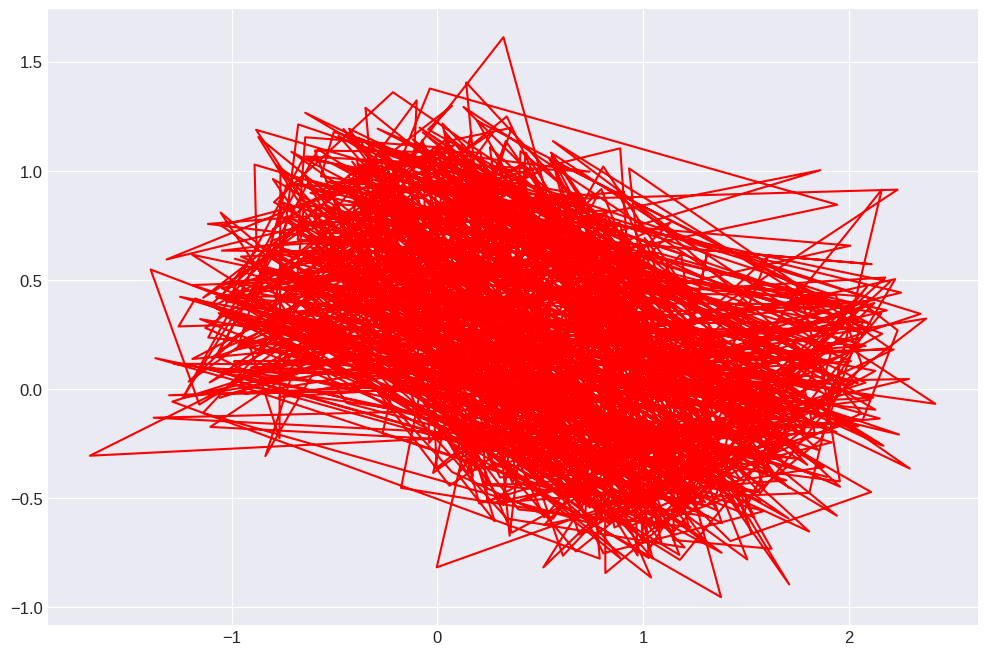

In [68]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig = plt.figure()
data = data_df
# Create a new line object
line, = plt.plot(data_df['A'], data_df['B'], 'r-')

# Define the function that updates the line object
def update_line(num, data):
    line.set_data(data[..., :num])
    return line,

# Create the animation object
ani = animation.FuncAnimation(fig, update_line, frames=100, fargs=(data,))

# Convert the animation to a GIF
gif_path = 'animation.gif'
ani.save(gif_path, writer='imagemagick', fps=30)

# Display the GIF in the Jupyter notebook
HTML('<img src="{}" width="500" height="300">'.format(gif_path))


In [35]:
markdown_table = results_binary_df.to_markdown(index=False)
print(markdown_table)

|   Learning rate |   No. of Epochs |   Dimension of hidden layer |   Training Accuracy |   Test Accuracy |
|----------------:|----------------:|----------------------------:|--------------------:|----------------:|
|            0.05 |            1000 |                           1 |             0.87375 |           0.855 |
|            0.05 |            1000 |                           5 |             0.875   |           0.855 |
|            0.05 |            1000 |                           4 |             0.8725  |           0.855 |
|            0.05 |            1000 |                           3 |             0.87375 |           0.855 |
|            0.05 |            1000 |                           2 |             0.8725  |           0.855 |
|            0.05 |            5000 |                           1 |             0.8725  |           0.855 |
|            0.05 |            5000 |                           5 |             0.9475  |           0.955 |
|            0.05 |         

|   Learning rate |   No. of Epochs |   Dimension of hidden layer |   Training Accuracy |   Test Accuracy |
|----------------:|----------------:|----------------------------:|--------------------:|----------------:|
|            0.05 |            1000 |                           1 |             0.87375 |           0.855 |
|            0.05 |            1000 |                           5 |             0.875   |           0.855 |
|            0.05 |            1000 |                           4 |             0.8725  |           0.855 |
|            0.05 |            1000 |                           3 |             0.87375 |           0.855 |
|            0.05 |            1000 |                           2 |             0.8725  |           0.855 |
|            0.05 |            5000 |                           1 |             0.8725  |           0.855 |
|            0.05 |            5000 |                           5 |             0.9475  |           0.955 |
|            0.05 |            5000 |                           4 |             0.8875  |           0.9   |
|            0.05 |            5000 |                           3 |             0.915   |           0.925 |
|            0.05 |            5000 |                           2 |             0.87375 |           0.86  |
|            0.1  |            1000 |                           1 |             0.87375 |           0.855 |
|            0.1  |            1000 |                           5 |             0.87375 |           0.855 |
|            0.1  |            1000 |                           4 |             0.87375 |           0.855 |
|            0.1  |            1000 |                           3 |             0.8725  |           0.855 |
|            0.1  |            1000 |                           2 |             0.8725  |           0.855 |
|            0.1  |            5000 |                           1 |             0.8725  |           0.855 |
|            0.1  |            5000 |                           5 |             0.97    |           0.965 |
|            0.1  |            5000 |                           4 |             0.96125 |           0.96  |
|            0.1  |            5000 |                           3 |             0.965   |           0.96  |
|            0.1  |            5000 |                           2 |             0.8725  |           0.855 |
|            0.15 |            1000 |                           1 |             0.87375 |           0.855 |
|            0.15 |            1000 |                           5 |             0.8875  |           0.89  |
|            0.15 |            1000 |                           4 |             0.8725  |           0.855 |
|            0.15 |            1000 |                           3 |             0.8725  |           0.855 |
|            0.15 |            1000 |                           2 |             0.8725  |           0.855 |
|            0.15 |            5000 |                           1 |             0.87125 |           0.855 |
|            0.15 |            5000 |                           5 |             0.98    |           0.96  |
|            0.15 |            5000 |                           4 |             0.87375 |           0.86  |
|            0.15 |            5000 |                           3 |             0.8725  |           0.855 |
|            0.15 |            5000 |                           2 |             0.8725  |           0.855 |
|            0.2  |            1000 |                           1 |             0.8725  |           0.855 |
|            0.2  |            1000 |                           5 |             0.89625 |           0.9   |
|            0.2  |            1000 |                           4 |             0.8725  |           0.855 |
|            0.2  |            1000 |                           3 |             0.8725  |           0.855 |
|            0.2  |            1000 |                           2 |             0.8725  |           0.855 |
|            0.2  |            5000 |                           1 |             0.8725  |           0.855 |
|            0.2  |            5000 |                           5 |             0.98125 |           0.96  |
|            0.2  |            5000 |                           4 |             0.8725  |           0.855 |
|            0.2  |            5000 |                           3 |             0.8725  |           0.855 |
|            0.2  |            5000 |                           2 |             0.87375 |           0.855 |
|            0.25 |            1000 |                           1 |             0.8725  |           0.855 |
|            0.25 |            1000 |                           5 |             0.8725  |           0.855 |
|            0.25 |            1000 |                           4 |             0.8725  |           0.855 |
|            0.25 |            1000 |                           3 |             0.92    |           0.93  |
|            0.25 |            1000 |                           2 |             0.8725  |           0.855 |
|            0.25 |            5000 |                           1 |             0.8725  |           0.855 |
|            0.25 |            5000 |                           5 |             0.9825  |           0.965 |
|            0.25 |            5000 |                           4 |             0.9825  |           0.965 |
|            0.25 |            5000 |                           3 |             0.97875 |           0.96  |
|            0.25 |            5000 |                           2 |             0.86875 |           0.855 |


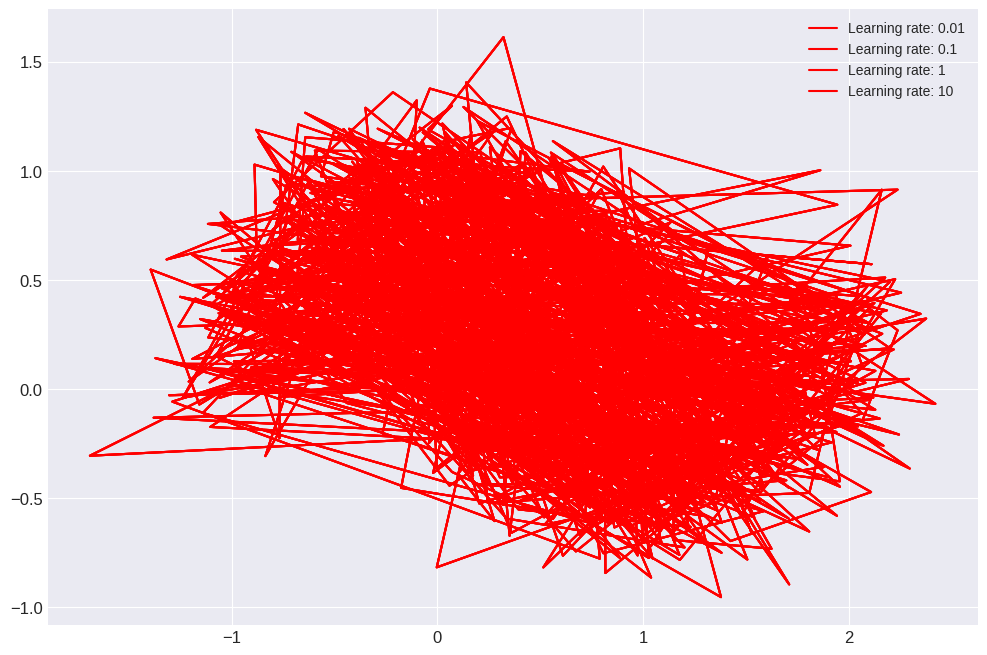

In [69]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig = plt.figure()

# Create a new line object for each learning rate
lines = []
learning_rates = [0.01, 0.1, 1, 10]
data = X
for lr in learning_rates:
    line, = plt.plot(data[:,0], data[:,1], 'r-', label=f"Learning rate: {lr}")
    lines.append(line)


# Define the function that updates the line objects
def update_lines(num, data):
    for i, line in enumerate(lines):
        line.set_data(data[..., :num, i])
    return lines

# Create the animation object
ani = animation.FuncAnimation(fig, update_lines, frames=700, fargs=(data,))

# Show the animation
plt.legend()
plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

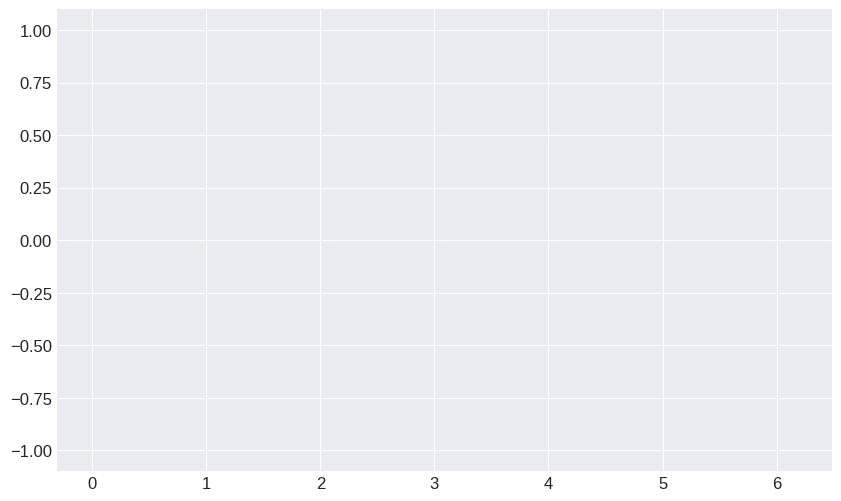

In [71]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = np.linspace(0, np.pi*2, 60) # a sine circle
y = np.sin(x) # sine
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = y[:i] # current sine
    ax.plot(x_t, y_t, c='blue')
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())